In [1]:
#!/usr/bin/env python
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# These lines that are commented out for the purpose of testing in jupyter notebook.
'''
model = "kOmegaSST"
yp = 1
'''
model = os.environ["model"]
yp = os.environ["yp"]
if (yp.find('.') == -1):
    yp = int(os.environ["yp"])
else:
    yp = float(os.environ["yp"])

'\nmodel = os.environ["model"]\nyp = os.environ["yp"]\nif (yp.find(\'.\') == -1):\n    yp = int(os.environ["yp"])\nelse:\n    yp = float(os.environ["yp"])\n'

In [7]:
# This line that is commented out for the purpose of testing in jupyter notebook.
#solverInfo_path = '../run/turbulentFlatPlate1/solverInfo_{}_{}.csv'.format(model, str(yp))
solverInfo_path = 'solverInfo_{}_{}.csv'.format(model, str(yp))
solverInfo_data = pd.read_csv(solverInfo_path, delim_whitespace=True, skiprows = 1)
solverInfo_data.head()

,Time,U_solver,Ux_initial,Ux_final,Ux_iters,Uy_initial,Uy_final,Uy_iters,U_converged,p_solver,p_initial,p_final,p_iters,p_converged
0,1,smoothSolver,1.000000,0.053604,2,1.000000,0.091371,1,False,GAMG,1.000000,0.078214,16,True
1,2,smoothSolver,0.039936,0.003989,3,0.197585,0.005002,1,False,GAMG,0.002437,0.000185,7,True
2,3,smoothSolver,0.014343,0.000915,5,0.098631,0.003412,1,False,GAMG,0.003718,0.000330,5,True
3,4,smoothSolver,0.008090,0.000651,5,0.063327,0.002458,1,False,GAMG,0.004031,0.000304,5,True
4,5,smoothSolver,0.005590,0.000505,5,0.045845,0.001789,1,False,GAMG,0.004191,0.000289,4,True


In [8]:
Ux_init_res = solverInfo_data['Ux_initial']
Uy_init_res = solverInfo_data['Uy_initial']
p_init_res = solverInfo_data['p_initial']
t = solverInfo_data['Time']

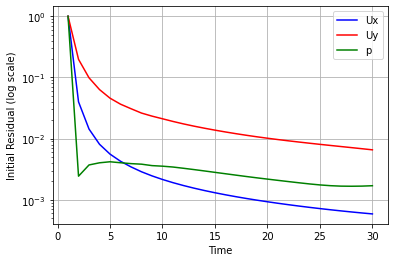

In [12]:
plt.figure()
plt.yscale("log")
plt.plot(t, Ux_init_res, color = 'b', label = "Ux")
plt.plot(t, Uy_init_res, color = 'r', label = "Uy")
plt.plot(t, p_init_res, color = 'g', label = "p")
plt.xlabel("Time")
plt.ylabel("Initial Residual (log scale)")
plt.grid()
plt.legend()
plt.savefig("solverInfo_{}_{}.pdf".format(model, str(yp)))